# Theory and Concepts
___
## Q1. Explain the concept of batch normalization in the context of Artificial Neural Networks.
___
## `Batch Normalization is a technique used in Artificial Neural Networks to improve training stability and speed up convergence.` It was introduced to address the internal covariate shift problem, which refers to the change in the distribution of layer inputs during training. By normalizing the inputs to each layer, Batch Normalization helps in stabilizing the training process and allows for the use of higher learning rates.

## The basic idea behind Batch Normalization is to normalize the activations of each layer across a mini-batch of data points. During training, for each mini-batch, the mean and variance of the activations for each layer are calculated, and the activations are normalized using these statistics. This is typically done before applying the activation function of the layer.

## Batch Normalization process can be summarized as follows for a layer with activations $x$:

- ## 1. Calculate the mean and variance of $x$ over the mini-batch.
- ## 2. Normalize $x$ using the mean and variance to get a normalized version, $\hat{x}$.
- ## 3. Scale and shift the normalized version using learnable parameters, $\gamma$ and $\beta$, respectively.
- ## 4. Pass the scaled and shifted version through an activation function, such as ReLU.

## Mathematically, the Batch Normalization operation for a mini-batch of size $m$ can be represented as:

# $ \mu_B = \frac{1}{m}\sum_{i=1}^{m}x_i $

# $ \sigma_B^2 = \frac{1}{m}\sum_{i=1}^{m}(x_i - \mu_B)^2 $
# $ x_{\text{norm}} = \frac{x - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} $
# $ \hat{x} = \gamma \times x_{\text{norm}} + \beta $

### *where:*
- ## $x$ is the input to the layer.
- ## $x_i$ is the $i^{th}$ element of the input mini-batch.
- ## $m$ is the mini-batch size.
- ## $μ_B$ is the mean of the mini-batch.
- ## $σ_{B^2}$ is the variance of the mini-batch.
- ## $ε$ is a small constant (usually added for numerical stability).
- ## $x_{norm}$ is the normalized version of $x$.
- ## $γ$ and $β$ are learnable scale and shift parameters, respectively.

## The parameters $γ$ and $β$ are learned during the training process and allow the model to undo the normalization if it is beneficial for the task.

## The benefits of Batch Normalization include improved training speed, increased model stability, and reduced sensitivity to initialization. It helps in mitigating the vanishing and exploding gradient problems, which often occur in deep neural networks.

## Batch Normalization has become a standard component in many neural network architectures and has contributed to the success of deep learning models in various tasks.

## Q2. Describe the benefits of using batch normalization during training.
___
## Batch Normalization offers several benefits during the training of neural networks:

## `1. Improved Training Speed:` By normalizing the activations of each layer, Batch Normalization helps in reducing internal covariate shift, which leads to more stable and faster convergence. As a result, the training process tends to be faster, requiring fewer iterations to achieve comparable performance.

## `2. Higher Learning Rates:` Batch Normalization reduces the sensitivity of the network to the choice of learning rate. This allows for the use of higher learning rates, which can further speed up the convergence process and help the model escape local minima.

## `3. Better Generalization:` By stabilizing the training process and reducing overfitting, Batch Normalization often leads to better generalization to unseen data. It helps prevent the model from memorizing noise in the training data, resulting in improved performance on the validation and test datasets.

## `4. Reduced Need for Regularization:` Batch Normalization itself acts as a form of regularization, as it adds some noise to the activations. This can reduce the need for other regularization techniques, such as dropout, in some cases.

## `5. Enables Deeper Networks:` Batch Normalization makes it easier to train deeper neural networks. Deep networks often suffer from vanishing or exploding gradients, but Batch Normalization helps in mitigating these issues, allowing the use of deeper architectures.

## `6. Increased Robustness to Initialization:` Batch Normalization makes neural networks less sensitive to the choice of initial weights and biases, reducing the need for careful parameter initialization.

## `7. Applicability to Various Architectures:` Batch Normalization can be applied to various types of neural network architectures, including feedforward networks, convolutional neural networks, and recurrent neural networks.

## *Overall, Batch Normalization is a powerful technique that greatly aids the training of deep neural networks, making them more stable, faster, and capable of achieving better generalization performance. As a result, it has become a standard component in many modern neural network architectures.*

## Q3. Discuss the working principle of batch normalization, including the normalization step and the learnable  parameters.
___
## The working principle of Batch Normalization (BN) involves two key steps: normalization and learnable parameters.

## `Normalization Step:`
## During the forward pass, Batch Normalization operates on a mini-batch of data within a layer. For each feature (activation) in the mini-batch, the normalization step aims to standardize the distribution to have zero mean and unit variance. This is achieved by subtracting the mini-batch mean and then dividing by the mini-batch standard deviation for each feature.

## Mathematically, for a feature $x_i$ in the mini-batch with size B (number of samples in the mini-batch), the normalization is performed as follows:

- ## 1. Calculate the mini-batch mean: $μ = (1/B) * Σ{x_i}$
- ## 2. Calculate the mini-batch variance: $σ^2 = (1/B) * Σ{(x_i - μ)^2}$
- ## 3. Normalize the feature: ${x_i}normalized = (x_i - μ) / \sqrt{σ^2 + ε}$

## Here, ε is a small constant added to the denominator to avoid division by zero and improve numerical stability.

## `Learnable Parameters:`
## In addition to the normalization step, Batch Normalization introduces learnable parameters that enable the network to restore the representational power of the original activations. These parameters are used during the backward pass to scale and shift the normalized features.

## For each feature x_i in the mini-batch, two learnable parameters are introduced: gamma (γ) and beta (β). These parameters are learned during training and are used to adjust the normalized feature as follows:

- ## 1. Calculate the scaled feature: $z_i = γ * {x_i}normalized$
- ## 2. Calculate the shifted feature: $y_i = z_i + β$

## The scaled and shifted features (y_i) are then used as the output of Batch Normalization for the current layer and are passed to the next layer.

## During training, both the mini-batch mean and variance are calculated for each mini-batch, while during inference (testing or prediction), the overall population mean and variance of the entire training set are used for normalization. This ensures consistent behavior between training and inference.

## The learnable parameters (γ and β) provide the model with the flexibility to decide whether to use the normalized feature or not, and in which scale and shift. This allows the network to maintain its representational power and adapt to different distributions of data during training, improving the performance and generalization capabilities of the model.

# Implementation
___
## Q1. Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it.
___

In [1]:
import warnings as w
w.filterwarnings('ignore')
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping

In [2]:
(X_train,y_train),(X_valid,y_valid) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

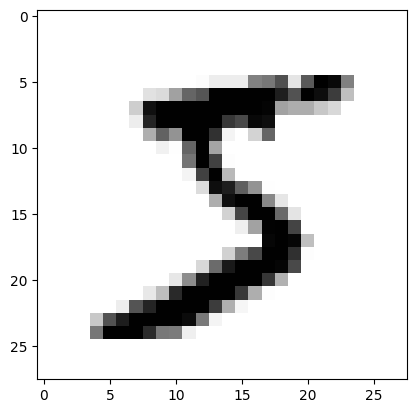

In [4]:
plt.imshow(X_train[0], cmap="binary")
plt.show()

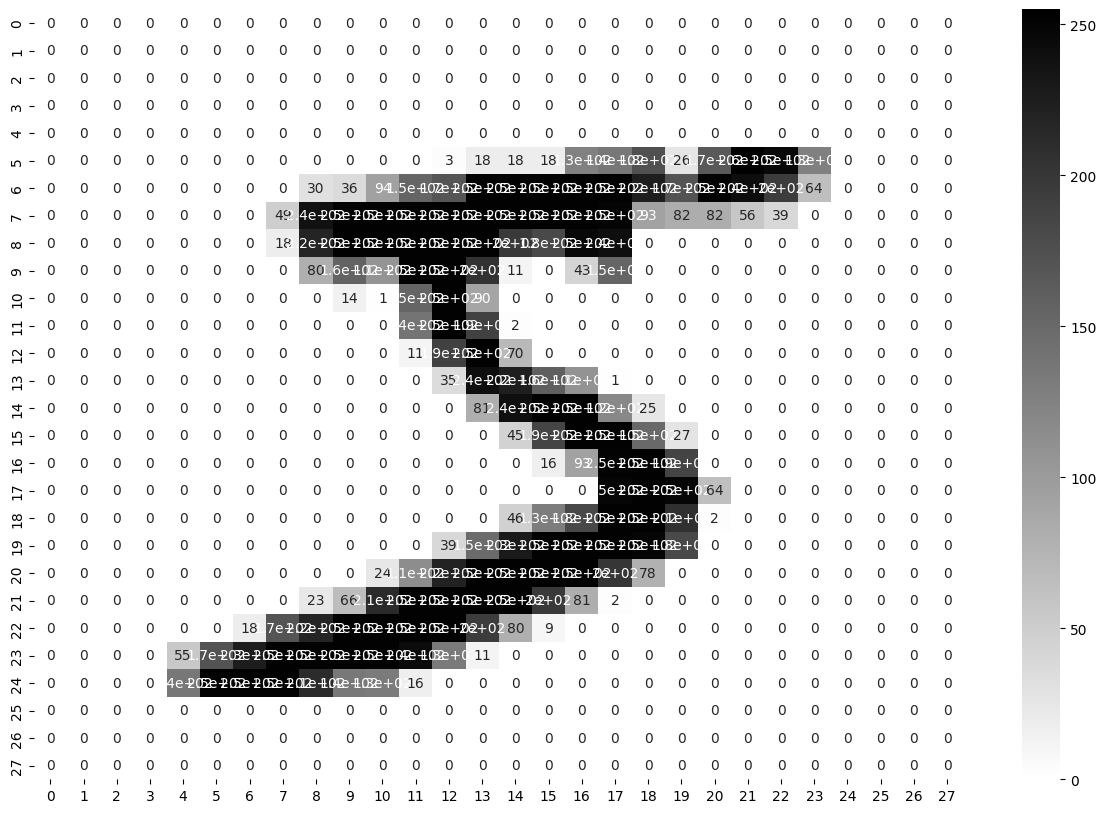

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train[0], annot=True, cmap="binary")
plt.show()

## Q2. Implement a simple feedforward neural network using any deep learning framework/library (e.g., TensorFlow, PyTorch).
___

In [6]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model = tf.keras.models.Sequential(LAYERS)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Q3. Train the neural network on the chosen dataset without using batch normalization.
___

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model_history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=32,epochs=50,
                          callbacks=EarlyStopping(monitor='val_loss',patience=5,min_delta=0.01))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4143 - accuracy: 0.8557 - val_loss: 0.3647 - val_accuracy: 0.9047
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2938 - accuracy: 0.9249 - val_loss: 0.2613 - val_accuracy: 0.9321
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2126 - accuracy: 0.9455 - val_loss: 0.1708 - val_accuracy: 0.9552
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1552 - accuracy: 0.9591 - val_loss: 0.1639 - val_accuracy: 0.9556
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1251 - accuracy: 0.9673 - val_loss: 0.1298 - val_accuracy: 0.9663
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1175 - accuracy: 0.9695 - val_loss: 0.1684 - val_accuracy: 0.9591
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1010 - accuracy: 0.9737 - val_loss: 0.1531 - val_accuracy:

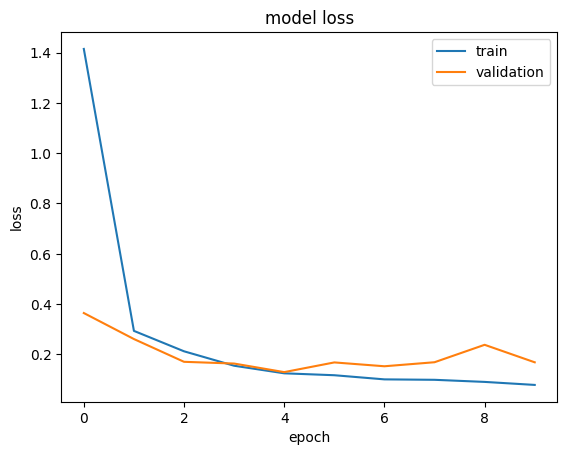

In [10]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

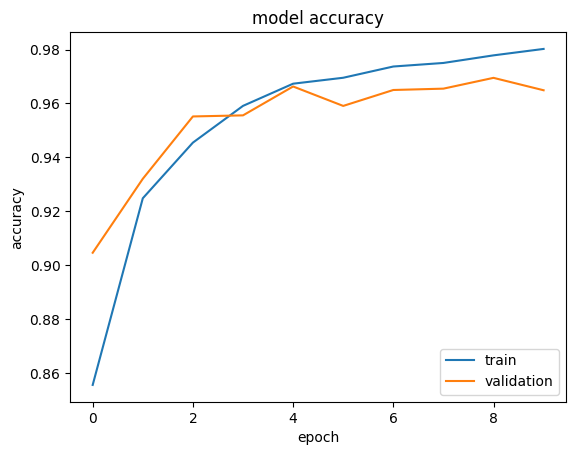

In [11]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [12]:
loss,accuracy = model.evaluate(X_valid,y_valid)
print('Model loss: ',loss)
print('Model accuracy: ',accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1689 - accuracy: 0.9649
Model loss:  0.1688532680273056
Model accuracy:  0.964900016784668


## Q4. Implement batch normalization layers in the neural network and train the model again.
___

In [13]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model = tf.keras.models.Sequential(LAYERS)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization (Batch  (None, 300)               1200      
 Normalization)                                                  
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 outputLayer (Dense)         (None, 10)               

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model_history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=32,epochs=50,
                          callbacks=EarlyStopping(monitor='val_loss',patience=5,min_delta=0.01))

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2128 - accuracy: 0.9362 - val_loss: 0.1036 - val_accuracy: 0.9681
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1067 - accuracy: 0.9665 - val_loss: 0.1180 - val_accuracy: 0.9727
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0819 - accuracy: 0.9739 - val_loss: 0.1763 - val_accuracy: 0.9721
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9786 - val_loss: 0.0994 - val_accuracy: 0.9737
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0555 - accuracy: 0.9822 - val_loss: 0.0970 - val_accuracy: 0.9756
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0482 - accuracy: 0.9841 - val_loss: 0.0777 - val_accuracy: 0.9775
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0421 - accuracy: 0.9862 - val_loss: 0.0816 - val_accuracy:

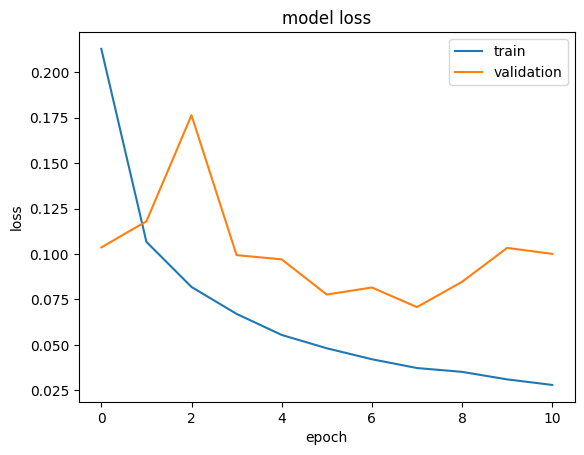

In [17]:
# summarize history for loss
plt.plot(bn_model_history.history['loss'])
plt.plot(bn_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

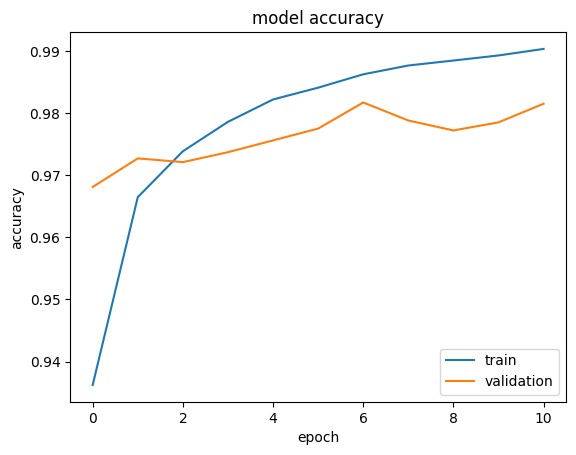

In [18]:
# summarize history for accuracy
plt.plot(bn_model_history.history['accuracy'])
plt.plot(bn_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [19]:
loss,accuracy = model.evaluate(X_valid,y_valid)
print('Model loss: ',loss)
print('Model accuracy: ',accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1001 - accuracy: 0.9815
Model loss:  0.10008617490530014
Model accuracy:  0.9815000295639038


## Q5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.
___

## `Model without Batch Normalization`

In [20]:
print("Train Accuracy:", model_history.history['accuracy'][-1])
print("Validation Accuracy:", model_history.history['val_accuracy'][-1])
print("Train Loss:", model_history.history['loss'][-1])
print("Validation Loss:", model_history.history['val_loss'][-1])

Train Accuracy: 0.9802166819572449
Validation Accuracy: 0.964900016784668
Train Loss: 0.07897043973207474
Validation Loss: 0.1688532680273056


## `Model with Batch Normalization`

In [21]:
print("Train Accuracy:", bn_model_history.history['accuracy'][-1])
print("Validation Accuracy:", bn_model_history.history['val_accuracy'][-1])
print("Train Loss:", bn_model_history.history['loss'][-1])
print("Validation Loss:", bn_model_history.history['val_loss'][-1])

Train Accuracy: 0.9903166890144348
Validation Accuracy: 0.9815000295639038
Train Loss: 0.028015004470944405
Validation Loss: 0.10008617490530014


## Q6. Discuss the impact of batch normalization on the training process and the performance of the neural network.
___
## Batch Normalization has a significant impact on the training process and the performance of neural networks. Here are the key benefits and impacts of using Batch Normalization:

- ## 1. `Improved Convergence:` Batch Normalization helps neural networks converge faster during training. It reduces the internal covariate shift, which is the change in the distribution of layer inputs during training. By normalizing the activations in each batch, Batch Normalization helps stabilize and speed up the training process.

- ## 2. `Higher Learning Rates:` Batch Normalization allows the use of higher learning rates without the risk of divergence. This is because it prevents large updates in the network's parameters, leading to a more stable training process.

- ## 3. `Reduction in Overfitting:` Batch Normalization acts as a form of regularization, reducing the chances of overfitting. It adds a slight amount of noise to each batch during training, similar to Dropout, which can help prevent overfitting and improve generalization.

- ## 4. `Independence from Initialization:` Batch Normalization makes neural networks less sensitive to weight initialization. This can be beneficial when dealing with deep networks, where selecting appropriate initial weights can be challenging.

- ## 5. `Removal of the Need for Explicit Normalization:` Batch Normalization normalizes the activations within each batch, which reduces the need for other normalization techniques like feature scaling.

- ## 6. `Robustness to Network Changes:` Batch Normalization makes the neural network more robust to changes in hyperparameters, such as learning rate and weight initialization. It allows you to use a wider range of hyperparameters without sacrificing performance.

## Despite these benefits, it's essential to consider some potential impacts or limitations of using Batch Normalization:

- ## 1. `Increased Computational Cost:` Batch Normalization introduces additional computations during training, which may increase training time and memory requirements.

- ## 2. `Batch Size Dependency:` The performance of Batch Normalization can be sensitive to the batch size used during training. Smaller batch sizes can lead to noisy batch statistics, affecting the quality of the normalization.

- ## 3. `Test-Time Performance:` During inference, the normalization must be adapted to individual samples rather than batches. This may result in slightly different performance during test-time compared to training-time.

- ## 4. `Layer Dependencies:` Batch Normalization is applied independently to each layer, which may introduce dependencies between the layers. This dependency may reduce the network's ability to learn hierarchical features.

## In conclusion, Batch Normalization is a powerful tool that can significantly improve the training process and the performance of deep neural networks. However, it's crucial to consider the computational cost and batch size sensitivity when using Batch Normalization, and to perform proper hyperparameter tuning to maximize its benefits.

# Experimentation and Analysis
___
## Q1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.
___

### **Batch size = 8**

In [38]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=8,epochs=50,
                          callbacks=EarlyStopping(monitor='val_loss',patience=5,min_delta=0.01))

Epoch 1/50
7500/7500 [==============================] - 21s 3ms/step - loss: 0.1053 - accuracy: 0.9685 - val_loss: 0.5827 - val_accuracy: 0.9796
Epoch 2/50
7500/7500 [==============================] - 21s 3ms/step - loss: 0.0892 - accuracy: 0.9717 - val_loss: 0.3269 - val_accuracy: 0.9809
Epoch 3/50
7500/7500 [==============================] - 21s 3ms/step - loss: 0.0883 - accuracy: 0.9724 - val_loss: 0.6201 - val_accuracy: 0.9781
Epoch 4/50
7500/7500 [==============================] - 21s 3ms/step - loss: 0.0859 - accuracy: 0.9728 - val_loss: 1.2449 - val_accuracy: 0.9795
Epoch 5/50
7500/7500 [==============================] - 26s 3ms/step - loss: 0.0822 - accuracy: 0.9741 - val_loss: 0.7475 - val_accuracy: 0.9795
Epoch 6/50
7500/7500 [==============================] - 25s 3ms/step - loss: 0.0740 - accuracy: 0.9767 - val_loss: 0.9813 - val_accuracy: 0.9813
Epoch 7/50
7500/7500 [==============================] - 23s 3ms/step - loss: 0.0732 - accuracy: 0.9770 - val_loss: 0.6741 - val_ac

In [39]:
print(f'Loss: {model.evaluate(X_valid,y_valid)[0]}\nAccuracy: {model.evaluate(X_valid,y_valid)[1]}')

313/313 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.9802
Loss: 0.6741466522216797
Accuracy: 0.9801999926567078


### **Batch size = 16**

In [36]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=16,epochs=50,
                          callbacks=EarlyStopping(monitor='val_loss',patience=5,min_delta=0.01))

Epoch 1/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0518 - accuracy: 0.9848 - val_loss: 0.2954 - val_accuracy: 0.9815
Epoch 2/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.1546 - val_accuracy: 0.9814
Epoch 3/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0355 - accuracy: 0.9884 - val_loss: 0.1015 - val_accuracy: 0.9807
Epoch 4/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0325 - accuracy: 0.9891 - val_loss: 0.1214 - val_accuracy: 0.9808
Epoch 5/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.5130 - val_accuracy: 0.9818
Epoch 6/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0302 - accuracy: 0.9899 - val_loss: 0.5266 - val_accuracy: 0.9823
Epoch 7/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.6112 - val_ac

In [37]:
print(f'Loss: {model.evaluate(X_valid,y_valid)[0]}\nAccuracy: {model.evaluate(X_valid,y_valid)[1]}')

313/313 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.9823
Loss: 0.4635581076145172
Accuracy: 0.9822999835014343


### **Batch size = 32**

In [34]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=32,epochs=50,
                          callbacks=EarlyStopping(monitor='val_loss',patience=5,min_delta=0.01))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9900 - val_loss: 0.0892 - val_accuracy: 0.9825
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.2400 - val_accuracy: 0.9822
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.2718 - val_accuracy: 0.9810
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.2357 - val_accuracy: 0.9833
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0122 - accuracy: 0.9956 - val_loss: 0.1258 - val_accuracy: 0.9797
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0123 - accuracy: 0.9957 - val_loss: 0.2295 - val_accuracy: 0.9822


In [35]:
print(f'Loss: {model.evaluate(X_valid,y_valid)[0]}\nAccuracy: {model.evaluate(X_valid,y_valid)[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2295 - accuracy: 0.9822
Loss: 0.22952798008918762
Accuracy: 0.982200026512146


### **Batch size = 64**

In [24]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=64,epochs=50,
                          callbacks=EarlyStopping(monitor='val_loss',patience=5,min_delta=0.01))

Epoch 1/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.1032 - val_accuracy: 0.9817
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0959 - val_accuracy: 0.9820
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.1251 - val_accuracy: 0.9821
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.1316 - val_accuracy: 0.9817
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0854 - val_accuracy: 0.9835
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.0750 - val_accuracy: 0.9836
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.1936 - val_accuracy: 0.9832
Epoch 

In [25]:
print(f'Loss: {model.evaluate(X_valid,y_valid)[0]}\nAccuracy: {model.evaluate(X_valid,y_valid)[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1140 - accuracy: 0.9822
Loss: 0.11402583122253418
Accuracy: 0.982200026512146


### **Batch size = 128**

In [26]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=128,epochs=50,
                          callbacks=EarlyStopping(monitor='val_loss',patience=5,min_delta=0.01))

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0912 - val_accuracy: 0.9841
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 3.7461e-04 - accuracy: 0.9999 - val_loss: 0.0704 - val_accuracy: 0.9848
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 2.2423e-04 - accuracy: 1.0000 - val_loss: 0.0829 - val_accuracy: 0.9856
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 2.2905e-04 - accuracy: 1.0000 - val_loss: 0.0915 - val_accuracy: 0.9857
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 3.0179e-04 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9856
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 3.5015e-04 - accuracy: 0.9999 - val_loss: 0.0844 - val_accuracy: 0.9858
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0935 - val_acc

In [27]:
print(f'Loss: {model.evaluate(X_valid,y_valid)[0]}\nAccuracy: {model.evaluate(X_valid,y_valid)[1]}')

313/313 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9831
Loss: 0.09353385120630264
Accuracy: 0.9830999970436096


### **Batch size = 256**

In [30]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=256,epochs=50,
                          callbacks=EarlyStopping(monitor='val_loss',patience=5,min_delta=0.01))

Epoch 1/50
235/235 [==============================] - 1s 6ms/step - loss: 3.6910e-04 - accuracy: 0.9999 - val_loss: 0.0760 - val_accuracy: 0.9854
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 1.0561e-04 - accuracy: 1.0000 - val_loss: 0.0803 - val_accuracy: 0.9846
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 5.6843e-05 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 0.9847
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 5.5056e-05 - accuracy: 1.0000 - val_loss: 0.0791 - val_accuracy: 0.9845
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 4.2896e-05 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 0.9848
Epoch 6/50
235/235 [==============================] - 2s 6ms/step - loss: 3.9339e-05 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9850


In [31]:
print(f'Loss: {model.evaluate(X_valid,y_valid)[0]}\nAccuracy: {model.evaluate(X_valid,y_valid)[1]}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9850
Loss: 0.07745744287967682
Accuracy: 0.9850000143051147


### **Batch size = 512**

In [32]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=512,epochs=50,
                          callbacks=EarlyStopping(monitor='val_loss',patience=5,min_delta=0.01))

Epoch 1/50
118/118 [==============================] - 1s 10ms/step - loss: 2.4699e-05 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 0.9848
Epoch 2/50
118/118 [==============================] - 1s 9ms/step - loss: 2.1689e-05 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 0.9849
Epoch 3/50
118/118 [==============================] - 1s 10ms/step - loss: 2.0347e-05 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9849
Epoch 4/50
118/118 [==============================] - 1s 10ms/step - loss: 2.0336e-05 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 0.9847
Epoch 5/50
118/118 [==============================] - 1s 9ms/step - loss: 1.8169e-05 - accuracy: 1.0000 - val_loss: 0.0801 - val_accuracy: 0.9848
Epoch 6/50
118/118 [==============================] - 1s 9ms/step - loss: 1.7191e-05 - accuracy: 1.0000 - val_loss: 0.0780 - val_accuracy: 0.9851


In [33]:
print(f'Loss: {model.evaluate(X_valid,y_valid)[0]}\nAccuracy: {model.evaluate(X_valid,y_valid)[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9851
Loss: 0.07795938849449158
Accuracy: 0.9850999712944031


### **Batch size = 1024**

In [40]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=1024,epochs=50,
                          callbacks=EarlyStopping(monitor='val_loss',patience=5,min_delta=0.01))

Epoch 1/50
59/59 [==============================] - 1s 17ms/step - loss: 0.0158 - accuracy: 0.9959 - val_loss: 0.2283 - val_accuracy: 0.9832
Epoch 2/50
59/59 [==============================] - 1s 16ms/step - loss: 0.0125 - accuracy: 0.9968 - val_loss: 0.2160 - val_accuracy: 0.9837
Epoch 3/50
59/59 [==============================] - 1s 17ms/step - loss: 0.0107 - accuracy: 0.9974 - val_loss: 0.2139 - val_accuracy: 0.9838
Epoch 4/50
59/59 [==============================] - 1s 17ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.2152 - val_accuracy: 0.9835
Epoch 5/50
59/59 [==============================] - 1s 18ms/step - loss: 0.0091 - accuracy: 0.9979 - val_loss: 0.2175 - val_accuracy: 0.9835
Epoch 6/50
59/59 [==============================] - 1s 17ms/step - loss: 0.0087 - accuracy: 0.9979 - val_loss: 0.2210 - val_accuracy: 0.9834
Epoch 7/50
59/59 [==============================] - 1s 16ms/step - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.2259 - val_accuracy: 0.9834


In [41]:
print(f'Loss: {model.evaluate(X_valid,y_valid)[0]}\nAccuracy: {model.evaluate(X_valid,y_valid)[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2259 - accuracy: 0.9834
Loss: 0.22586797177791595
Accuracy: 0.9833999872207642


## **Observation**:
* ## `Training Time`: The training time is reduces as increasing the batch size.
* ## `Performance`: The model performance is slightly increases to a particular batch size and after that the performance again goes down.

## Q2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.
___
## `Advantages of Batch Normalization:`

## 1. `Faster Convergence:` Batch Normalization reduces internal covariate shift, which leads to more stable and faster convergence during training. It allows the use of larger learning rates, which speeds up the training process.

## 2. `Reduced Sensitivity to Initialization:` Batch Normalization helps to mitigate the impact of weight initialization choices, making the network less sensitive to initialization issues. It allows for using relatively large initial weights without causing training instabilities.

## 3. `Regularization Effect:` Batch Normalization acts as a form of regularization, reducing the need for other regularization techniques like dropout. It helps prevent overfitting and improves the generalization of the model.

## 4. `Improved Gradient Flow:` By normalizing the activations within each mini-batch, Batch Normalization maintains the activations closer to the linear region of activation functions. This facilitates better gradient flow during backpropagation and mitigates the vanishing gradient problem.

## 5. `Robustness to Learning Rate Choice:` Batch Normalization helps in stabilizing the training process, making the model less sensitive to the choice of learning rate. This allows for using larger learning rates, which can speed up convergence.

## 6. `Applicability to Various Architectures:` Batch Normalization is a versatile technique that can be applied to different architectures, including convolutional neural networks (CNNs) and recurrent neural networks (RNNs).

## `Limitations of Batch Normalization:`

## 1. `Batch Size Dependency:` The performance of Batch Normalization depends on the choice of batch size. Very small batch sizes may lead to noisy estimates of mini-batch statistics, affecting the normalization process. In some cases, extremely small batch sizes (e.g., during transfer learning) may not allow the benefits of Batch Normalization to fully manifest.

## 2. `Influence of Mini-batch Order:` The order of data in mini-batches can impact the effectiveness of Batch Normalization. Shuffling the data can introduce variability in the mini-batch statistics, which may affect training performance.

## 3. `Computational Overhead:` Batch Normalization introduces additional computations during both forward and backward passes, as it requires calculating the mini-batch statistics and the normalization operation. This overhead can be significant for large models and batch sizes.

## 4. `Incompatibility with Certain Architectures:` In some architectures, such as recurrent neural networks (RNNs), applying Batch Normalization directly to the recurrent connections can lead to undesirable effects, such as instability during training. Techniques like Layer Normalization and Group Normalization have been proposed to address this issue.

## 5. `Dependency on Batch Size for Inference:` During inference, Batch Normalization relies on the statistics calculated during training. Therefore, the model may perform differently with varying batch sizes during inference, which can be problematic in certain deployment scenarios.

## *Overall, despite its limitations, Batch Normalization has become a standard practice in deep learning due to its effectiveness in improving training stability, convergence speed, and generalization performance. It is a widely adopted technique that significantly enhances the training of deep neural networks across various domains.*